# Biodiversity In National Parks

## Prompt

For this project, you will interpret data from the National Parks Service about endangered species in different parks.

You will perform some data analysis on the conservation statuses of these species and investigate if there are any patterns or themes to the types of species that become endangered. During this project, you will analyze, clean up, and plot data as well as pose wuestions and seek to answer them in a meaningful way.

After you perform your analysis, you will share your findings about the National Park Service.

## Analysis Questions
* What is the distribution of conservation_status for animals?
* Are certain types of species more likely to be endangered?
* Are the differences between species and their conservation status significant?
* Which species were spotted the most at each park?



In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Loading the Data

In [11]:
observations = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

## Exploring the Data

In [24]:
print(observations.head())
print(observations.shape)
parks = observations.park_name.unique()
scientific_names = observations.scientific_name.unique()
print(parks)
print(np.count_nonzero(scientific_names))


            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
(23296, 3)
['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
5541


From this basic exploration, we are able to gather that the 23,296 rows represent the obervation of 5,541 species across 4 different national parks (Great Smoky Mountains National Park, Yosemite National Park, Bryce National Park, Yellowstone National Park).

In [35]:
print(species.head())
print(species.shape)
print(species.category.unique())
print(species.conservation_status.unique())


  category                scientific_name   
0   Mammal  Clethrionomys gapperi gapperi  \
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
(5824, 4)
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']
[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


Within the exploration of species_info.csv, the dataset represents the category, scientific name, commone name, and conservation status of 5,824 different species. These species are included within mammals, birds, reptiles, amphibians, fish, vascular plants, or nonvascular plants. The convervation status of these species can range between species of concern, endangered, threatened, in recovery, or unknown. 

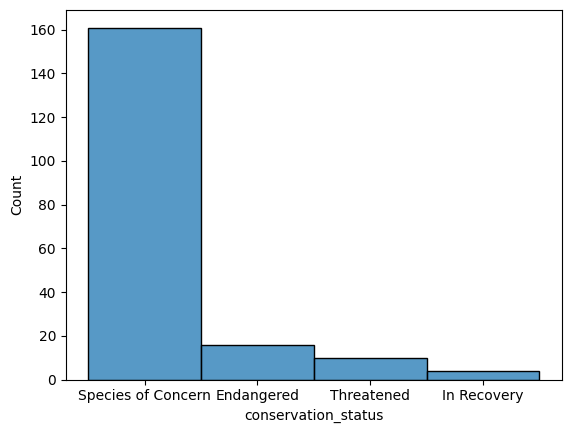

<Figure size 640x480 with 0 Axes>

In [32]:
sns.histplot(x='conservation_status', data=species)
plt.show()
plt.clf()

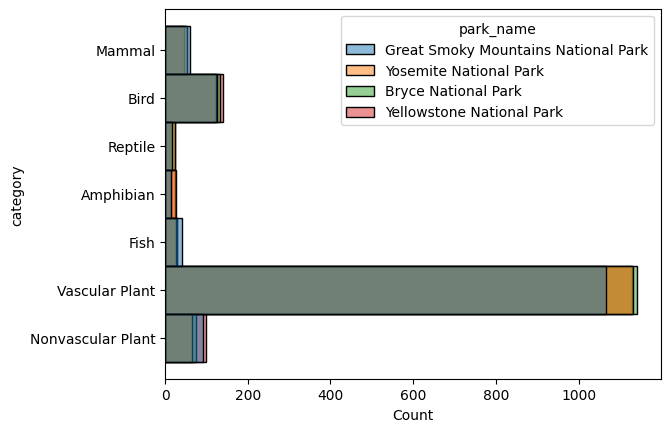

<Figure size 640x480 with 0 Axes>

In [39]:
endangered = species[species['conservation_status'] == 'Endangered']
sns.histplot(y='category', data=species, hue = observations.park_name)
plt.show()
plt.clf()

In [52]:
observations_max = observations.groupby('park_name').max().reset_index()
print(observations_max)

                             park_name                      scientific_name   
0                  Bryce National Park  Zygodon viridissimus var. rupestris  \
1  Great Smoky Mountains National Park  Zygodon viridissimus var. rupestris   
2            Yellowstone National Park  Zygodon viridissimus var. rupestris   
3               Yosemite National Park  Zygodon viridissimus var. rupestris   

   observations  
0           176  
1           147  
2           321  
3           223  


"\nsmoky_mountain_observations = observations[observations['park_name'] == 'Great Smoky Mountains National Park']\nmost_observed = smoky_mountain_observations[smoky_mountain_observations['observations'] == smoky_mountain_observations['observations'].max()]\nprint(most_observed)\n"